- **Data Science Project Using Machine learning and python**

- product reviews are important for online shopping
- Reviews on products are real time.
- Vast customer reviews creates an opportunity to see how the market reacts to a specific product.
- We will try and predict a sentiment of a product review using python and machine learning.

In [1]:
# Import required libraries

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
import math

import warnings
warnings.filterwarnings('ignore') #Hides warning
warnings.filterwarnings("ignore", category=DeprecationWarning)
warnings.filterwarnings("ignore", category=UserWarning)

sns.set_style("whitegrid") #plotting style

np.random.seed(7)  # seeding random number generator

df = pd.read_csv('amazon.csv')
print(df.head())

                     id                                               name  \
0  AVqkIhwDv8e3D1O-lebb  All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...   
1  AVqkIhwDv8e3D1O-lebb  All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...   
2  AVqkIhwDv8e3D1O-lebb  All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...   
3  AVqkIhwDv8e3D1O-lebb  All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...   
4  AVqkIhwDv8e3D1O-lebb  All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...   

        asins   brand                                         categories  \
0  B01AHB9CN2  Amazon  Electronics,iPad & Tablets,All Tablets,Fire Ta...   
1  B01AHB9CN2  Amazon  Electronics,iPad & Tablets,All Tablets,Fire Ta...   
2  B01AHB9CN2  Amazon  Electronics,iPad & Tablets,All Tablets,Fire Ta...   
3  B01AHB9CN2  Amazon  Electronics,iPad & Tablets,All Tablets,Fire Ta...   
4  B01AHB9CN2  Amazon  Electronics,iPad & Tablets,All Tablets,Fire Ta...   

                                                keys manufacturer  \
0  84

# Describing the Dataset.


In [2]:
data = df.copy()
data.describe()

,reviews.id,reviews.numHelpful,reviews.rating,reviews.userCity,reviews.userProvince
count,1.0,34131.000000,34627.000000,0.0,0.0
mean,111372787.0,0.630248,4.584573,NaN,NaN
std,NaN,13.215775,0.735653,NaN,NaN
min,111372787.0,0.000000,1.000000,NaN,NaN
25%,111372787.0,0.000000,4.000000,NaN,NaN
50%,111372787.0,0.000000,5.000000,NaN,NaN
75%,111372787.0,0.000000,5.000000,NaN,NaN
max,111372787.0,814.000000,5.000000,NaN,NaN


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34660 entries, 0 to 34659
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    34660 non-null  object 
 1   name                  27900 non-null  object 
 2   asins                 34658 non-null  object 
 3   brand                 34660 non-null  object 
 4   categories            34660 non-null  object 
 5   keys                  34660 non-null  object 
 6   manufacturer          34660 non-null  object 
 7   reviews.date          34621 non-null  object 
 8   reviews.dateAdded     24039 non-null  object 
 9   reviews.dateSeen      34660 non-null  object 
 10  reviews.didPurchase   1 non-null      object 
 11  reviews.doRecommend   34066 non-null  object 
 12  reviews.id            1 non-null      float64
 13  reviews.numHelpful    34131 non-null  float64
 14  reviews.rating        34627 non-null  float64
 15  reviews.sourceURLs 

**We need to clean up the `name column` by referencing asins (unique products) since we have 7000 missing values:**

In [4]:
print(data.isnull())

          id   name  asins  brand  categories   keys  manufacturer  \
0      False  False  False  False       False  False         False   
1      False  False  False  False       False  False         False   
2      False  False  False  False       False  False         False   
3      False  False  False  False       False  False         False   
4      False  False  False  False       False  False         False   
...      ...    ...    ...    ...         ...    ...           ...   
34655  False   True  False  False       False  False         False   
34656  False   True  False  False       False  False         False   
34657  False   True  False  False       False  False         False   
34658  False   True  False  False       False  False         False   
34659  False   True  False  False       False  False         False   

       reviews.date  reviews.dateAdded  reviews.dateSeen  ...  \
0             False              False             False  ...   
1             False          

In [6]:
data.isnull

<bound method DataFrame.isnull of                          id  \
0      AVqkIhwDv8e3D1O-lebb   
1      AVqkIhwDv8e3D1O-lebb   
2      AVqkIhwDv8e3D1O-lebb   
3      AVqkIhwDv8e3D1O-lebb   
4      AVqkIhwDv8e3D1O-lebb   
...                     ...   
34655  AVpfiBlyLJeJML43-4Tp   
34656  AVpfiBlyLJeJML43-4Tp   
34657  AVpfiBlyLJeJML43-4Tp   
34658  AVpfiBlyLJeJML43-4Tp   
34659  AVpfiBlyLJeJML43-4Tp   

                                                    name       asins   brand  \
0      All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...  B01AHB9CN2  Amazon   
1      All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...  B01AHB9CN2  Amazon   
2      All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...  B01AHB9CN2  Amazon   
3      All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...  B01AHB9CN2  Amazon   
4      All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...  B01AHB9CN2  Amazon   
...                                                  ...         ...     ...   
34655                            

In [8]:
data.isnull().sum()

id                          0
name                     6760
asins                       2
brand                       0
categories                  0
keys                        0
manufacturer                0
reviews.date               39
reviews.dateAdded       10621
reviews.dateSeen            0
reviews.didPurchase     34659
reviews.doRecommend       594
reviews.id              34659
reviews.numHelpful        529
reviews.rating             33
reviews.sourceURLs          0
reviews.text                1
reviews.title               5
reviews.userCity        34660
reviews.userProvince    34660
reviews.username            2
dtype: int64

In [9]:
data.isnull().sum().sum()

157224

In [10]:
data["asins"].unique()

array(['B01AHB9CN2', 'B00VINDBJK', 'B005PB2T0S', 'B002Y27P3M',
       'B01AHB9CYG', 'B01AHB9C1E', 'B01J2G4VBG', 'B00ZV9PXP2',
       'B0083Q04TA', 'B018Y229OU', 'B00REQKWGA', 'B00IOYAM4I',
       'B018T075DC', nan, 'B00DU15MU4', 'B018Y225IA', 'B005PB2T2Q',
       'B018Y23MNM', 'B00OQVZDJM', 'B00IOY8XWQ', 'B00LO29KXQ',
       'B00QJDU3KY', 'B018Y22C2Y', 'B01BFIBRIE', 'B01J4ORNHU',
       'B018SZT3BK', 'B00UH4D8G2', 'B018Y22BI4', 'B00TSUGXKE',
       'B00L9EPT8O,B01E6AO69U', 'B018Y23P7K', 'B00X4WHP5E', 'B00QFQRELG',
       'B00LW9XOJM', 'B00QL1ZN3G', 'B0189XYY0Q', 'B01BH83OOM',
       'B00BFJAHF8', 'B00U3FPN4U', 'B002Y27P6Y', 'B006GWO5NE',
       'B006GWO5WK'], dtype=object)

In [11]:
asins_unique = len(data["asins"].unique())
print("Number of Unique ASINs:" + str(asins_unique))

Number of Unique ASINs:42


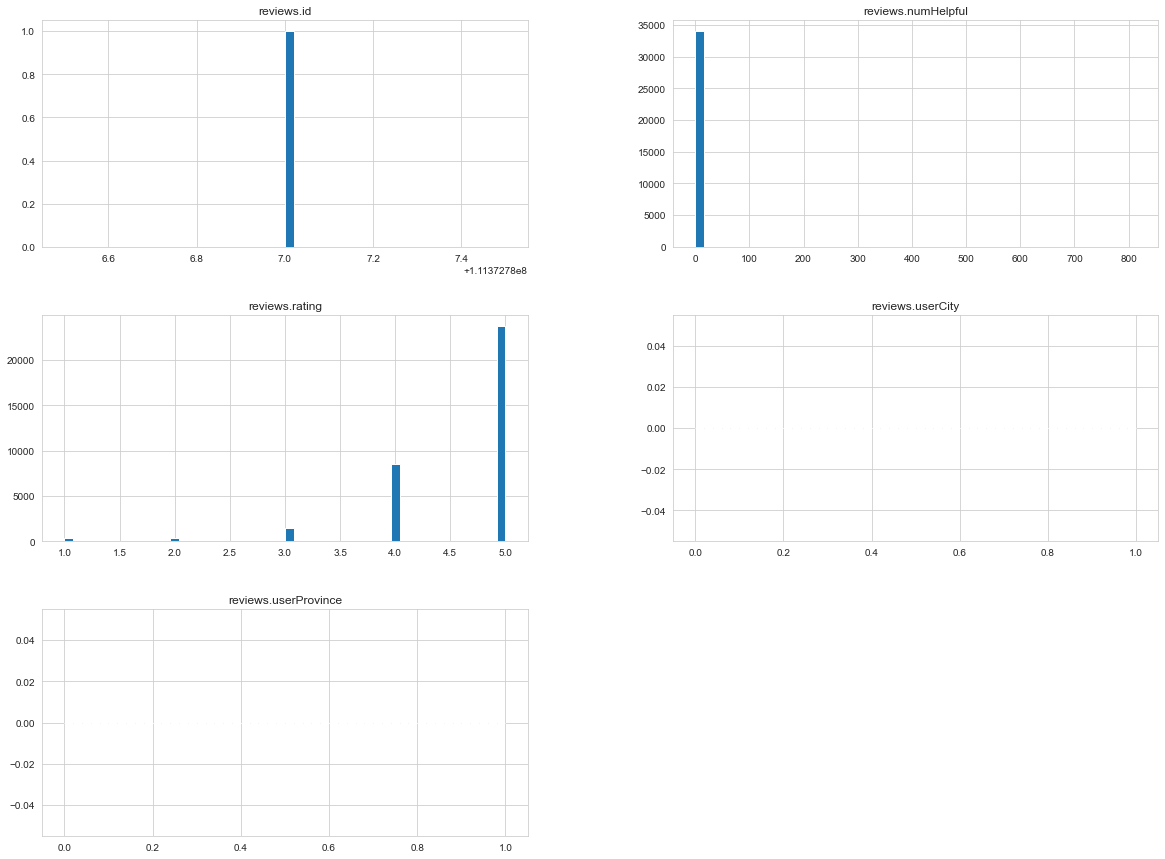

In [12]:
## Visualizing the distributions of numerical variables:

data.hist(bins=50, figsize=(20,15))
plt.show()

- **Outliers in this case are valuable, we may want to weight reviews that had more than 50+ people who find them helpful.**
- **Majority of examples were rated highly (loooking at rating distribution).**
- There is twice amount of 5 star ratings than the other ratings combined.

## Split the data into Train and Test

- Our goal is to train a sentiment analysis classifier.
- Since the majority of reviews are 5 stars, we will need to do a stratified split on the reviews score to ensure that we dont train the classifier on imbalanced data.

In [13]:
from sklearn.model_selection import StratifiedShuffleSplit

print('Before {}'.format(len(data)))

dataAfter = data.dropna(subset=['reviews.rating']) #Removes all NaN in reviews.rating

print('After {}'.format(len(dataAfter)))
dataAfter['reviews.rating'] = dataAfter['reviews.rating'].astype(int)

split = StratifiedShuffleSplit(n_splits=5, test_size=0.25)

for train_index, test_index in split.split(dataAfter,
                                           dataAfter['reviews.rating']):
    strat_train = dataAfter.reindex(train_index)
    strat_test = dataAfter.reindex(test_index)

Before 34660
After 34627


- **We need to see if train and test sets were stratified proportionately in comparison to raw data:**

In [14]:
print(len(strat_train))
print(len(strat_test))
print(strat_test['reviews.rating'].value_counts()/len(strat_test))

25970
8657
5.0    0.686728
4.0    0.244542
3.0    0.043895
1.0    0.012591
2.0    0.011551
Name: reviews.rating, dtype: float64


## Data Exploration (Training Set)

- **We will use regular expressions to clean out any unfavourable characters in the dataset**
- **preview what the data looks like after cleaning**

In [15]:
reviews = strat_train.copy()
reviews.head()

,id,name,asins,brand,categories,keys,manufacturer,reviews.date,reviews.dateAdded,reviews.dateSeen,...,reviews.doRecommend,reviews.id,reviews.numHelpful,reviews.rating,reviews.sourceURLs,reviews.text,reviews.title,reviews.userCity,reviews.userProvince,reviews.username
29019,AVpfpK8KLJeJML43BCuD,NaN,B01BH83OOM,Amazon Echo,"Featured Brands,Electronics,Amazon Devices,Hom...","amazonecho/b01bh83oom,amazon/b01bh83oom,amazon...",Amazon,2016-06-10T00:00:00.000Z,NaN,"2017-09-28T00:00:00Z,2017-09-08T00:00:00Z,2017...",...,True,NaN,0.0,5.0,http://reviews.bestbuy.com/3545/5097300/review...,Purchased this as a gift for a teenage kid as ...,Love this product ...,NaN,NaN,vishal
794,AVqkIhwDv8e3D1O-lebb,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",B01AHB9CN2,Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...","841667104676,amazon/53004484,amazon/b01ahb9cn2...",Amazon,2017-03-17T00:00:00.000Z,2017-05-21T05:55:33Z,"2017-04-30T00:41:00.000Z,2017-06-07T09:03:00.000Z",...,True,NaN,0.0,5.0,http://reviews.bestbuy.com/3545/5620406/review...,This is a fantastic tablet for the price. This...,Great tablet,NaN,NaN,Payppayp
131,AVqkIhwDv8e3D1O-lebb,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",B01AHB9CN2,Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...","841667104676,amazon/53004484,amazon/b01ahb9cn2...",Amazon,2017-01-23T00:00:00.000Z,2017-05-21T06:01:53Z,"2017-04-30T00:44:00.000Z,2017-06-07T09:04:00.000Z",...,True,NaN,0.0,5.0,http://reviews.bestbuy.com/3545/5620406/review...,Really like the updates this product has in co...,Great update to my existing kindle,NaN,NaN,Champ
24575,AVpfl8cLLJeJML43AE3S,"Echo (White),,,\r\nEcho (White),,,","B00L9EPT8O,B01E6AO69U",Amazon,"Stereos,Remote Controls,Amazon Echo,Audio Dock...","echowhite/263039693056,echowhite/152558276095,...",Amazon,2016-11-11T00:00:00.000Z,NaN,"2017-09-28T00:00:00Z,2017-09-08T00:00:00Z,2017...",...,True,NaN,0.0,5.0,http://reviews.bestbuy.com/3545/5588528/review...,"I recommend this to everyone, the ability to g...",Top notch,NaN,NaN,CharlesBitch
15713,AVpjEN4jLJeJML43rpUe,"Fire Kids Edition Tablet, 7 Display, Wi-Fi, 16...",B018Y225IA,Amazon,"Computers/Tablets & Networking,Tablets & eBook...","841667103143,0841667103143,brandnewamazonkindl...",Amazon,2016-07-22T00:00:00.000Z,NaN,"2017-08-27T00:00:00Z,2017-08-09T00:00:00Z,2017...",...,True,NaN,0.0,5.0,http://reviews.bestbuy.com/3545/5025500/review...,features are similar to my fire 6 and this upg...,"great tablet, easy to use",NaN,NaN,eyedoc


In [16]:
print(len(reviews['name'].unique()), len(reviews['asins'].unique()))

print(reviews.info())

print(reviews.groupby('asins')['name'].unique())

46 34
<class 'pandas.core.frame.DataFrame'>
Int64Index: 25970 entries, 29019 to 5332
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    25943 non-null  object 
 1   name                  20888 non-null  object 
 2   asins                 25941 non-null  object 
 3   brand                 25943 non-null  object 
 4   categories            25943 non-null  object 
 5   keys                  25943 non-null  object 
 6   manufacturer          25943 non-null  object 
 7   reviews.date          25930 non-null  object 
 8   reviews.dateAdded     18001 non-null  object 
 9   reviews.dateSeen      25943 non-null  object 
 10  reviews.didPurchase   1 non-null      object 
 11  reviews.doRecommend   25552 non-null  object 
 12  reviews.id            1 non-null      float64
 13  reviews.numHelpful    25591 non-null  float64
 14  reviews.rating        25943 non-null  float64
 15  reviews.so

- **Check all the different names for this product that have 2 ASINs:**

In [18]:
different_names = reviews[reviews['asins'] ==
                         "B00L9EPT8O,B01E6AO69U"]["name"].unique()

for name in different_names:
    print(name)
    
print(reviews[reviews["asins"]== "B00L9EPT8O,B01E6AO69U"]["name"].value_counts())

Echo (White),,,
Echo (White),,,
Amazon Fire Tv,,,
Amazon Fire Tv,,,
Amazon - Amazon Tap Portable Bluetooth and Wi-Fi Speaker - Black,,,
Amazon - Amazon Tap Portable Bluetooth and Wi-Fi Speaker - Black,,,
nan
Amazon Fire Hd 10 Tablet, Wi-Fi, 16 Gb, Special Offers - Silver Aluminum,,,
Amazon Fire Hd 10 Tablet, Wi-Fi, 16 Gb, Special Offers - Silver Aluminum,,,
Amazon 9W PowerFast Official OEM USB Charger and Power Adapter for Fire Tablets and Kindle eReaders,,,
Amazon 9W PowerFast Official OEM USB Charger and Power Adapter for Fire Tablets and Kindle eReaders,,,
Amazon 5W USB Official OEM Charger and Power Adapter for Fire Tablets and Kindle eReaders,,,
Amazon 5W USB Official OEM Charger and Power Adapter for Fire Tablets and Kindle eReaders,,,
New Amazon Kindle Fire Hd 9w Powerfast Adapter Charger + Micro Usb Angle Cable,,,
New Amazon Kindle Fire Hd 9w Powerfast Adapter Charger + Micro Usb Angle Cable,,,
Amazon Kindle Fire 5ft USB to Micro-USB Cable (works with most Micro-USB Tablets),,,

- **Output confirms that each ASIN can have multiple names.**
- **Analyse which ASINS do well, not product names**

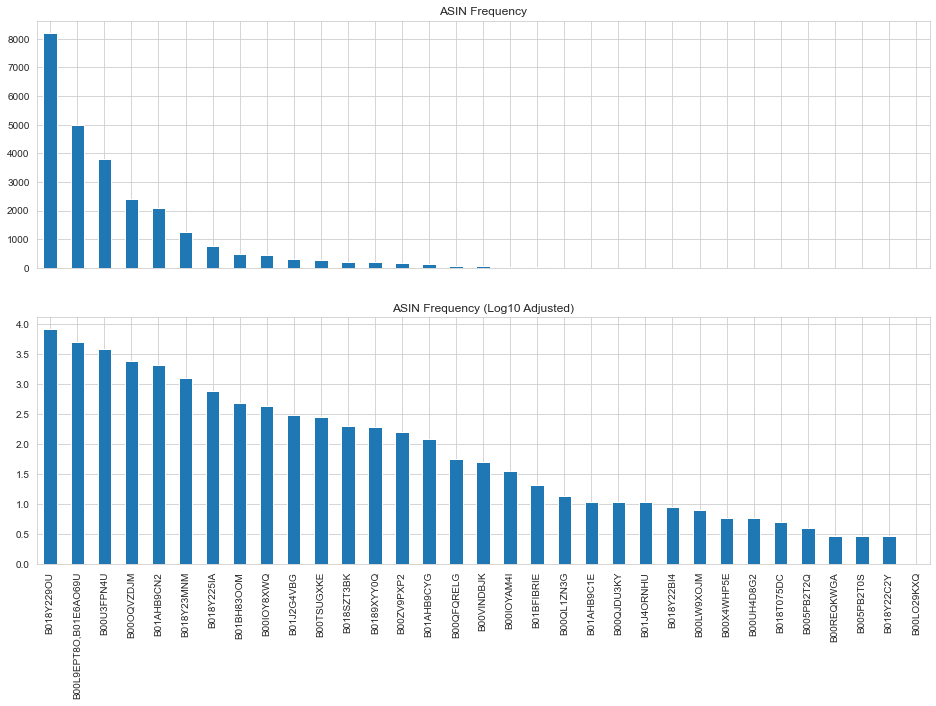

In [20]:
fid = plt.figure(figsize=(16,10))
ax1 = plt.subplot(211)
ax2 = plt.subplot(212,  sharex = ax1)

reviews['asins'].value_counts().plot(kind='bar', ax=ax1, title= "ASIN Frequency")

np.log10(reviews["asins"].value_counts()).plot(kind="bar", ax=ax2,
                                              title = "ASIN Frequency (Log10 Adjusted)")

plt.show()

## Entire training dataset average rating

4.586709324287862


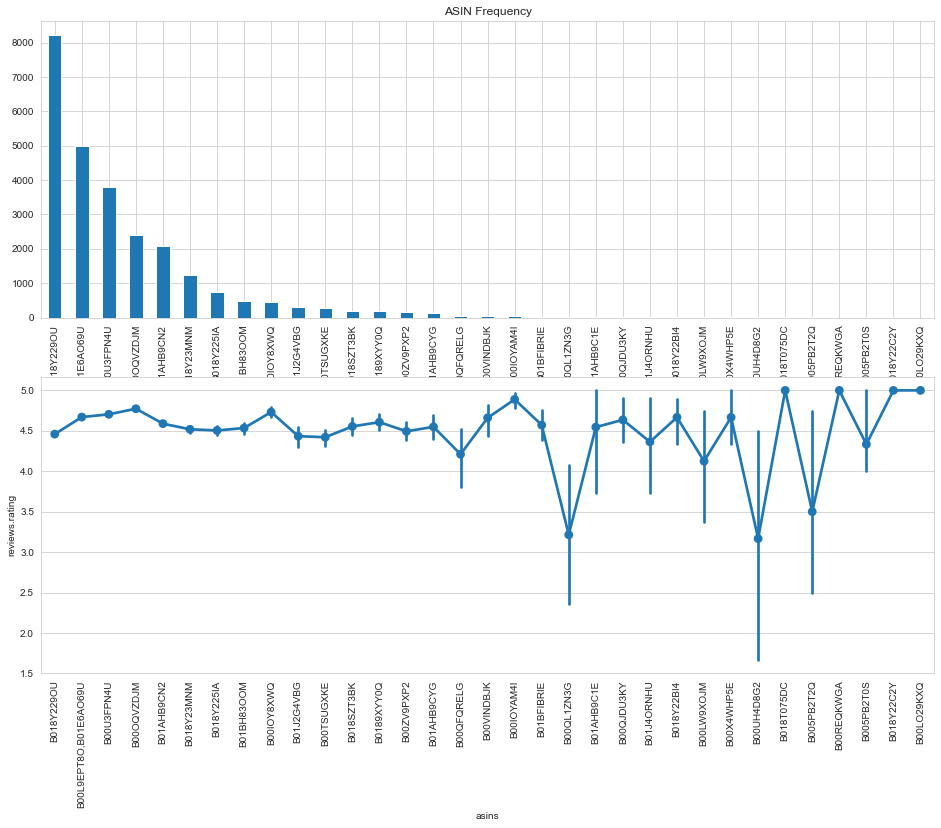

In [21]:
print(reviews["reviews.rating"].mean())


asins_count_ix = reviews["asins"].value_counts().index

plt.subplots(2,1,figsize=(16,12))
plt.subplot(2,1,1)

reviews["asins"].value_counts().plot(kind="bar", title = 'ASIN Frequency')

plt.subplot(2,1,2)

sns.pointplot(x="asins", y="reviews.rating", order=asins_count_ix, data=reviews)

plt.xticks(rotation=90)

plt.show()

## Sentiment Analysis
- Using features in place, we will build a classifier that can determine a review's sentiment.




In [22]:
def sentiments(rating):
    if (rating ==5) or (rating== 4):
        return "Positive"
    elif rating ==3:
        return "Neutral"
    elif (rating ==2) or (rating ==1):
        return "Negative"
    
# Add sentiments to the data

strat_train["Sentiment"] = strat_train["reviews.rating"].apply(sentiments)
strat_test["Sentiment"] = strat_test['reviews.rating'].apply(sentiments)

print(strat_train["Sentiment"][:30])

29019    Positive
794      Positive
131      Positive
24575    Positive
15713    Positive
15859    Positive
20958    Positive
32293    Positive
22808    Negative
12835    Positive
27256    Positive
19740    Positive
6590     Positive
8907     Positive
5357     Positive
13258    Negative
3582     Positive
10023    Positive
13805    Positive
10098    Positive
4204     Positive
11751    Positive
14424     Neutral
7019      Neutral
12598     Neutral
20319    Positive
7463      Neutral
20372    Positive
18081    Positive
25553     Neutral
Name: Sentiment, dtype: object
